# Residuales Bayesianos

## Autores

1. Alvaro Mauricio Montenegro Díaz, ammontenegrod@unal.edu.co

## Referencias

1. Alvaro Montenegro, [Curso de Estadística Bayesiana](https://github.com/AprendizajeProfundo/Estadistica-Bayesiana), 2020
2. De Paula Gilberto, ["MODELOS DE REGRESSÃO com apoio computacional, ](https://www.ime.usp.br/~giapaula/texto_2013.pdf), Instituto de Matemática e Estatística  Universidade de São  Paulo
3.  ["Stan User's Guide. Version 2.22", Stan Development Team, 2020.](https://mc-stan.org/users/documentation/)
4. Kumar, Ravin and Carroll, Colin and Hartikainen, Ari and Martin, Osvaldo A., [ArviZ a unified library for exploratory analysis of Bayesian models in Python](https://arviz-devs.github.io/arviz/), [The Journal of Open Source Software], 2019.
5. Richard McElreath, ["Statistical Rethinking, A Bayesian Course with examples in R and Stan"](http://xcelab.net/rmpubs/rethinking/Statistical_Rethinking_sample.pdf), version compilada en noviembre 9 de 2015.


# Introduccción


En esta lección introducimos la primera herramienta para la evaluación de los modelos. Como seguramente ya sabe, en la estadística Bayesiana siempre trabajamos con distribuciones posteriores.

En la estadística clásica se define un residual como sigue. Si $y_i$ es una observación, con media $\mu_i$, entonces el residual, que denotaremos por $r_i$ se define por

$$
r_i = (y_i-\hat{\mu}_i),
$$

en donde $\hat{\mu}_i$ es una estimación de  $\mu_i$.

El problema con esta medida es que depende de la escala de la observación, por lo que si $\sigma_i^2$ es la varianza de $y_i$ entonces el residual estandarizado es dado por

$$
re_i = \frac{(y_i-\hat{\mu}_i)}{\hat{\sigma}_i},
$$

en donde $\hat{\sigma}_i$ es la estimación de $\sigma_i^2$ .

El residual de pearson es definido por 


$$
rp_i = \frac{(y_i-\hat{\mu}_i)^2}{\hat{\sigma}_i^2},
$$
el cual es siempre positivo.




## Nota

Dado que $E[y_i]=\hat{\mu}_i$, es frecuente denotar usar la notación $\tilde{y}_i$ en lugar de  $\hat{\mu}_i$.Es comun llamar $\tilde{y}_i$ como el valor ajustado por el modelo para $y_i$.

En los siguientes ejemplos vamos a suponer que las estimaciones son máximo-verosímil, aunque tecnicamente no es realmente necesario.

# Residuales. Enfoque clásico

En esta sección se definen los residuales Bayesianos como una generalización de esta sección.

## Ejemplo 1. Modelo de regresión lineal Gaussiano 

En este caso el modelo estadístico es definido por

$$
\begin{align}
E[y_i] &= \mu_i =  \alpha +  \mathbf{x_i}^T\mathbf{\beta} \\
\log \sigma_i &= \eta +\mathbf{z_i}^T\mathbf{\nu} \\
\alpha &\sim \mathcal{N}(\mu_{\alpha},\sigma_{\alpha}^2)\\
\mathbf{\beta} &\sim \mathcal{N}(\mathbf{\mu}_{\beta},\rho_{\beta}^2\mathbf{I})\\
\eta &\sim \mathcal{N}(\mu_{\eta},\sigma_{\eta}^2)\\
\mathbf{\nu} &\sim \mathcal{N}(\mathbf{\mu}_{\nu},\rho_{\nu}^2\mathbf{I})\\
y_i &\sim \mathcal{N}(\mu_i,\sigma_i^2), \hspace{3mm} i =1,\ldots,n
\end{align}
$$


Entonces, si $\hat{\mathbf{\theta}} = (\hat{\alpha},\hat{\eta}, \hat{\mathbf{\beta}}^T,\hat{\mathbf{\nu}}^T)^T$, se tiene que

$$
\begin{align}
\hat{\mu}_i &=  \hat{\alpha} +  \mathbf{x_i}^T\hat{\mathbf{\beta}} \\
\ln \hat{\sigma}_i &=  \hat{\eta} +  \mathbf{z_i}^T\hat{\mathbf{\nu}} \\ 
\end{align}
$$

En el caso homocedástico, se tiene que $\sigma_i^2 = \sigma^2$.

## Ejemplo 2. Modelo regresión Binomial

La función *inv_logit* es definida por $\text{inv_logit}(x) = (1+ \exp (-x))^{-1}$. Esta es la función de distribuición acumulada logística.

El modelo Binomial de regresión se define por


$$
\begin{align}
E[y_i] &= \mu_i= N_i\pi_i\\
\pi_i &=  \text{inv_logit}(\alpha +  \mathbf{x_i}^T\mathbf{\beta}) \\
y_i &\sim \text{Binomial}(N_i,\pi_i), \hspace{3mm} i =1,\ldots,n.
\end{align}
$$

Los valores $N_i$ se asumen conocidos. En este caso se tiene que $Var[y_i] = N_i\pi_i(1-\pi)$, por lo que $\sigma_i =\sqrt{N_i\pi_i(1-\pi)} $. 

Si $\hat{\alpha}$ y $\hat{\mathbf{\beta}}$ son las respectivas estimaciones, entonces se tiene que

$$
\begin{align}
\hat{\pi}_i &= \text{inv_logit}( \hat{\alpha} +  \mathbf{x_i}^T\hat{\mathbf{\beta}}) \\
\hat{\mu}_i &= N_i \hat{\pi}_i \\
\hat{\sigma}_i &=  \sqrt{N_i\hat{\pi}_i(1-\hat{\pi}_i)} \\ 
\end{align}
$$




## Ejemplo 3. Modelo de regresión Poisson

El modelo Poisson de regresión se define por



$$
\begin{align}
E[y_i] &= \mu_i\\
\ln \mu_i&=  \alpha +  \mathbf{x_i}^T\mathbf{\beta}\\
\alpha &\sim \mathcal{N}(\mu_{\alpha},\sigma_{\alpha}^2)\\
\mathbf{\beta} &\sim \mathcal{N}(\mathbf{\mu}_{\beta},\rho_{\beta}^2\mathbf{I})\\
y_i &\sim \text{Poisson}(\mu_i), \hspace{3mm} i =1,\ldots,n.
\end{align}
$$


Si $\hat{\alpha}$ y $\hat{\mathbf{\beta}}$ son las respectivas estimaciones, entonces se tiene que


$$
\begin{align}
\ln \hat{\mu}_i &=  \hat{\alpha} +  \mathbf{x_i}^T\hat{\mathbf{\beta}} \\
\hat{\sigma}_i &=  \sqrt{\hat{\mu}_i}\\ 
\end{align}
$$


## Ejemplo 4. Modelo de regresión Beta

El modelo de regresión Beta lo hemos definido como

$$
\begin{align}
E[y_i] &= \mu_i\\
 \mu_i&=  \text{inv_logit}(\alpha +  \mathbf{x_i}^T\mathbf{\beta})\\
\ln \phi_i & = \eta +  \mathbf{z_i}^T\mathbf{\nu}\\
\alpha &\sim \mathcal{N}(\mu_{\alpha},\sigma_{\alpha}^2)\\
\mathbf{\beta} &\sim \mathcal{N}(\mathbf{\mu}_{\beta},\rho_{\beta}^2\mathbf{I})\\
\eta &\sim \mathcal{N}(\mu_{\eta},\sigma_{\eta}^2)\\
\mathbf{\nu} &\sim \mathcal{N}(\mathbf{\mu}_{\nu},\rho_{\nu}^2\mathbf{I})\\
y_i &\sim \text{Beta}(\mu_i\phi_i,(1-\mu_i)\phi_i), \hspace{3mm} i =1,\ldots,n
\end{align}
$$

Entonces, si $\hat{\mathbf{\theta}} = (\hat{\alpha},\hat{\eta}, \hat{\mathbf{\beta}}^T,\hat{\mathbf{\nu}}^T)^T$, se tiene que

$$
\begin{align}
\hat{\mu}_i &= \text{inv_logit} (\hat{\alpha} +  \mathbf{x_i}^T\hat{\mathbf{\beta}})\\
\ln\hat{\phi}_i &=  \hat{\eta} +  \mathbf{z_i}^T\hat{\mathbf{\nu}}\\
\hat{\sigma}_i &= \sqrt{\frac{\hat{\mu}_i(1-\hat{\mu}_i)}{1+\hat{\phi}_i}} \\ 
\end{align}
$$


## Ejemplo 5: Modelo de regresión Gama

El modelo de regresión Gama se define así:

$$
\begin{align}
E[y_i] &= \mu_i\\
\ln \mu_i&=  \alpha +  \mathbf{x_i}^T\mathbf{\beta}\\
\ln \phi_i & = \eta +  \mathbf{z_i}^T\mathbf{\nu}\\
\alpha &\sim \mathcal{N}(\mu_{\alpha},\sigma_{\alpha}^2)\\
\mathbf{\beta} &\sim \mathcal{N}(\mathbf{\mu}_{\beta},\rho_{\beta}^2\mathbf{I})\\
\eta &\sim \mathcal{N}(\mu_{\eta},\sigma_{\eta}^2)\\
\mathbf{\nu} &\sim \mathcal{N}(\mathbf{\mu}_{\nu},\rho_{\nu}^2\mathbf{I})\\
y_i &\sim \text{Gama}(\mu_i^2\phi_i,\mu_i\phi_i), \hspace{3mm} i=1,\ldots,n.
\end{align}
$$


Entonces, si $\hat{\mathbf{\theta}} = (\hat{\alpha},\hat{\eta}, \hat{\mathbf{\beta}}^T,\hat{\mathbf{\nu}}^T)^T$, se tiene que

$$
\begin{align}
\ln\hat{\mu}_i &= \hat{\alpha} +  \mathbf{x_i}^T\hat{\mathbf{\beta}}\\
\ln\hat{\phi}_i &=  \hat{\eta} +  \mathbf{z_i}^T\hat{\mathbf{\nu}} \\ 
\hat{\sigma}_i  &= \sqrt{\tfrac{1}{\hat{\phi}_i}}
\end{align}
$$

## Modelo de regresión $t$-Student

La distribución  $t$-Student tiene función de densidad dada por


Hemos definido el modelo de regresión mediante

$$
\begin{align}
\mu_i &=  \alpha +  \mathbf{x_i}^T\mathbf{\beta} \\
\ln \varphi_i &= \eta +\mathbf{z_i}^T\mathbf{\nu} \\
\ln(\kappa_i-2.00001) &= \xi +\mathbf{s_i}^T\mathbf{\omega} \\
\alpha &\sim \mathcal{N}(\mu_{\alpha},\sigma_{\alpha}^2)\\
\mathbf{\beta} &\sim \mathcal{N}(\mathbf{\mu}_{\beta},\rho_{\beta}^2\mathbf{I})\\
\eta &\sim \mathcal{N}(\mu_{\eta},\sigma_{\eta}^2)\\
\mathbf{\nu} &\sim \mathcal{N}(\mathbf{\mu}_{\nu},\rho_{\nu}^2\mathbf{I})\\
\xi &\sim \mathcal{N}(\mu_{\xi},\sigma_{\xi}^2)\\
\mathbf{\omega} &\sim \mathcal{N}(\mathbf{\mu}_{\omega},\rho_{\omega}^2\mathbf{I})\\
y_i &\sim \mathcal{N}(\mu_i,\sigma_i^2), \hspace{3mm} i =1,\ldots,n.
\end{align}
$$


El parámetro del problema es $\mathbf{\theta} = (\alpha,\eta,\xi, \mathbf{\beta}^T,\mathbf{\nu}^T,\mathbf{\omega}^T)^T$. 

Entonces, si $\hat{\mathbf{\theta}} = (\hat{\alpha},\hat{\eta}, \hat{\xi},\hat{\mathbf{\beta}}^T,\hat{\mathbf{\nu}}^T,\hat{\mathbf{\omega}}^T)^T$, se tiene que

$$
\begin{align}
\hat{\mu}_i &= \hat{\alpha} +  \mathbf{x_i}^T\hat{\mathbf{\beta}}\\
\ln\hat{\varphi}_i &=  \hat{\eta} +  \mathbf{z_i}^T\hat{\mathbf{\nu}} \\
\ln(\hat{\kappa}_i-2.00001) &=  \hat{\xi} +  \mathbf{s_i}^T\hat{\mathbf{\omega}} \\
\hat{\sigma}_i  &=\hat{\varphi}_i \sqrt{\frac{\hat{\kappa}_i}{\hat{\kappa}_i-2}}
\end{align}
$$

# Residuales Bayesianos 

En el caso Bayesiano, se considera siempre la distribución asociada ala cantidad de interes. En este caso los residuales. Esto es bastante ventajoso, por que al no ser una cantidad única como en ela caso clásico, es posible evaluar de una mejor manera el modelo a partir de los residuales del modelo.

Para la práctica, el procedimiento para obtener la distribución de residuales es como sigue. Supongamos que $\mu_i^{(k)}$ y $\sigma_i^{(k)}$ son los funcionales asociados a la muestra en el paso $k$.

Por ejemplo, consideresmos el modelo de regresión Beta. Supongamos que $\alpha^{(k)}$, $\eta^{(k)}$, $\mathbf{\beta}^{(k)} y $\mathbf{\nu}^{(k)} son las muestras de los parámetros del problema en le paso $k$ del muestreados Bayesiano. Entonces se tiene que 


$$
\begin{align}
{\mu}_i^{(k)} &=  \text{inv_logit}(\alpha^{(k)} + \mathbf{x_i}^T\mathbf{\beta}^{(k)})\\
{\phi}_i^{(k)}  &= \sqrt{\exp(\eta^{(k)} +  \mathbf{z_i}^T\mathbf{\nu}^{(k)})}\\
{\sigma}_i^{(k)}&= \sqrt{\frac{1}{{\phi}_i^{(k)}}}
\end{align}
$$

y el residual estandarizado en el paso $k$ del muestreador es entonces

$$
r_i^{(k)} = \frac{y_i -{\mu}_i^{(k)}}{{\sigma}_i^{(k)}}
$$

## Ejemplo 1. Modelo de regresión Bernoulli: Modelo Logístico.

Este es el caso particular del modelo de regresión Binomial en donde $N_i=1$, en todas las observaciones.

En este caso se tiene que 



$$
\begin{align}
E[y_i] &= \mu_i= \pi_i\\
\pi_i &=  \text{inv_logit}(\alpha +  \mathbf{x_i}^T\mathbf{\beta}) \\
y_i &\sim \text{Bernulli}(\pi_i)
\end{align}
$$
con $i =1,\ldots,n$. 

Si $\hat{\alpha}$ y $\hat{\mathbf{\beta}}$ son las respectivas estimaciones, entonces se tiene que

$$
\begin{align}
\hat{\pi}_i &=  \text{inv_logit}(\hat{\alpha} +  \mathbf{x_i}^T\hat{\mathbf{\beta}}) \\
\hat{\mu}_i &= \hat{\pi}_i \\
\hat{\sigma}_i &=  \sqrt{\hat{\pi}(1-\hat{\pi})} \\ 
\end{align}
$$

Para ilustrar el cálculo y uso de los residuales consideramos el problema del Parcial 1.


La tabla 2 muestra  los datos experimentales sobre la influencia de la razón y del volúmen del aire aspirado en la constricción vascular de la piel de los dedos de la mano, de un experimento reportado por Predigon. 



La respuesta es dicotómica: ocurrencia (1), y no ocurrecia (0). Se asume para cada observación $Y_i \sim \text{Bernoulli}(\pi_i)$. El modelo lineal logistico es definido por




 ### Datos
 
      y   vol   razón
      1  3.70    0.825
      1  3.50    1.090
      1  1.25    2.500
      1  0.75    1.500
      1  0.80    3.200
      1  0.70    3.500
      0  0.60    0.750
      0  1.10    1.700
      0  0.90    0.750
      0  0.90    0.450
      0  0.80    0.570
      0  0.55    2.750
      0  0.60    3.000
      1  1.40    2.330
      1  0.75    3.750
      1  2.30    1.640
      1  3.20    1.600
      1  0.85    1.415
      0  1.70    1.060
      1  1.80    1.800
      0  0.40    2.000
      0  0.95    1.360
      0  1.35    1.350
      0  1.50    1.360
      1  1.60    1.780
      0  0.60    1.500
      1  1.80    1.500
      0  0.95    1.900
      1  1.90    0.950
      0  1.60    0.400
      1  2.70    0.750
      0  2.35    0.030
      0  1.10    1.830
      1  1.10    2.200
      1  1.20    2.000
      1  0.80    3.330
      0  0.95    1.900
      0  0.75    1.900
      1  1.30    1.625

*Tabla 2. datos sobre influencia de la razón y del volúmen del aire aspirado en la constricción vascular de la piel de los dedos de la mano*

### Estimación y residuales con Stan

In [1]:
# Cargue librerias necesarias
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pystan

In [2]:
path ='./datos/'
file ='pregibon.dat'
pregibon = pd.read_csv(path+file, sep='\s+',header=None)
pregibon.columns = ['Y','Volume','Razon']
pregibon.head()

,Y,Volume,Razon
0,1,3.70,0.825
1,1,3.50,1.090
2,1,1.25,2.500
3,1,0.75,1.500
4,1,0.80,3.200


In [4]:
# data dictionary
datLogit = {'N':pregibon.shape[0], 'K':3,'Y':np.array(pregibon['Y']),
          'volume': np.array(pregibon['Volume']), 
          'razon': np.array(pregibon['Razon'])}

In [5]:
#stan
import pystan
%load_ext stanmagic

In [6]:
%%stan -f logit_reg_p1.stan
// Modelo de regresion Bernoulli  (modelo logistico)

data{
 // number of observations
 int<lower=1> N;
 // dim regression parameter
 int<lower=1> K;
 // Observations
 int<lower=0> Y[N];
 // volume
 vector<lower=0>[N] volume;   
  // razon
 vector<lower=0>[N] razon;     
 }

transformed data{
vector[N] log_vol;
vector[N] log_razon;   
//
log_vol = log(volume);
log_razon = log(razon);
}

parameters{
 vector[K]  beta;
}

model{
// priors
beta ~ normal(0,10);
// likelihood   
for (i in 1:N){
   Y[i] ~ bernoulli_logit(beta[1] + beta[2]*log_vol[i] + beta[3]*log_razon[i]);
}
}


generated quantities{
  vector[N] residual;
  vector[N] prob; 
  for (i in 1:N){
      prob[i] = inv_logit(beta[1] + beta[2]*log_vol[i] + beta[3]*log_razon[i]);
      residual[i] = (Y[i]-prob[i])/sqrt(prob[i]*(1-prob[i]));
      }
}

Using pystan.stanc compiler..
-------------------------------------------------------------------------------
Model compiled successfully. Output stored in _stan_model object.
Type _stan_model in a cell to see a nicely formatted code output in a notebook
     ^^^^^^^^^^^
Access model compile output properties
_stan_model.model_file -> Name of stan_file [logit_reg_p1.stan]
_stan_model.model_name -> Name of stan model [logit_reg_p1_model]
_stan_model.model_code -> Model code [// Modelo de regresi ....]


In [ ]:
Observe que los residuales son calculados en la sección generated quantities

In [7]:
logit_model_p1 = pystan.StanModel(file=_stan_model.model_file)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_f634e5664d2d6b3bcac408b60cd59f84 NOW.


In [8]:
# sampling
logit_model_sample_p1 =logit_model_p1.sampling(data=datLogit, iter = 4000)

In [9]:
#logit_model_sample_p1
print(logit_model_sample_p1.stansummary(["beta", "residual"]))

Inference for Stan model: anon_model_f634e5664d2d6b3bcac408b60cd59f84.
4 chains, each with iter=4000; warmup=2000; thin=1; 
post-warmup draws per chain=2000, total post-warmup draws=8000.

               mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
beta[1]       -3.22    0.03   1.31  -6.12  -4.03  -3.07   -2.3  -1.05   1522    1.0
beta[2]        5.85    0.05   1.89   2.73   4.48   5.63   6.99   10.0   1661    1.0
beta[3]        5.11    0.05   1.84   2.12   3.77   4.91   6.25   9.23   1520    1.0
residual[1]    0.23  2.6e-3   0.17   0.03   0.11   0.19   0.31   0.68   4281    1.0
residual[2]    0.14  1.9e-3   0.11   0.02   0.06   0.11   0.18   0.42   3142    1.0
residual[3]    0.28  2.5e-3   0.12   0.09   0.19   0.26   0.35   0.56   2582    1.0
residual[4]    4.92    0.09   3.62   1.62   2.79   3.86   5.78  14.49   1464    1.0
residual[5]    0.54  3.2e-3   0.23   0.19   0.38   0.51   0.67   1.07   5057    1.0
residual[6]    0.64  3.8e-3    0.3   0.22   0.43   0.59

### Análisis exploratorio de los datos

In [ ]:
Primero vamos a extraer la cadenas para generar algunos gráficos de los residuales.

In [10]:
residuals = logit_model_sample_p1.extract(['residual'])

In [11]:
residuals = residuals['residual']

In [12]:
residuals.shape

(8000, 39)

In [13]:
residuals[0:10,0:5]

array([[0.12741828, 0.09048963, 0.37258967, 3.92471487, 0.84235288],
       [0.05104475, 0.03767305, 0.34184268, 5.41745969, 1.0907046 ],
       [0.3752068 , 0.29985152, 0.53405986, 1.94847084, 0.77595163],
       [0.13139218, 0.04357872, 0.06426887, 6.60048768, 0.13096037],
       [0.28404869, 0.16216365, 0.26430795, 3.4158009 , 0.43374739],
       [0.13122492, 0.07055722, 0.26231965, 7.7083358 , 0.64730739],
       [0.09572539, 0.06880749, 0.27187282, 2.65190564, 0.59961136],
       [0.57545823, 0.28860749, 0.28541988, 4.31611339, 0.39636163],
       [0.08560778, 0.04234459, 0.16194645, 6.74939023, 0.42151029],
       [0.45144425, 0.3047917 , 0.49833779, 3.32934799, 0.75523202]])

In [ ]:
# hace una tabla residual indice
# indice del residual
# sample size
#sz = 8000
# number of observations
#no = 39
#
#id =[]
#for i in range(0,no):
#    ii = sz*[i]
#    id+= ii
#id = np.array(id)  
#reshape residual
#residuals =residuals.reshape(residuals.shape[0]*residuals.shape[1])
# pega residuales e indice de la observación
#data = np.vstack([residuals, id]).T

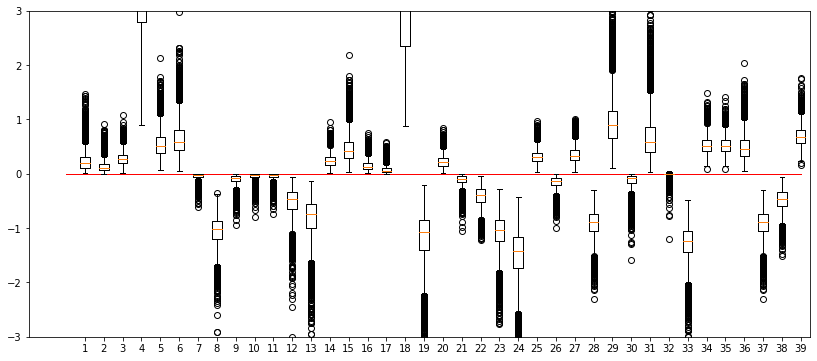

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize =(14,6))
ax.set_ylim(-3, 3)
plt.plot([0, 39], [0, 0], color='r', linestyle='-', linewidth=1)
ax.boxplot(residuals)

plt.show()


In [15]:
import pandas as pd
rp = pd.DataFrame(residuals)
rp.describe().T

,count,mean,std,min,25%,50%,75%,max
0,8000.0,0.232515,0.172580,0.006118,0.112600,0.188349,0.306851,1.471350e+00
1,8000.0,0.138602,0.106980,0.002610,0.062875,0.110017,0.184650,9.161396e-01
2,8000.0,0.279568,0.124754,0.020121,0.188724,0.262616,0.352734,1.074113e+00
3,8000.0,4.915605,3.619969,0.893192,2.791142,3.859945,5.777714,6.488744e+01
4,8000.0,0.540080,0.227765,0.061231,0.376274,0.506285,0.669893,2.133750e+00
5,8000.0,0.643413,0.295938,0.054904,0.432966,0.591855,0.800935,2.969504e+00
6,8000.0,-0.042576,0.051364,-0.613966,-0.055762,-0.025620,-0.009587,-3.841053e-05
7,8000.0,-1.053112,0.263075,-2.914953,-1.204761,-1.024386,-0.870264,-3.478282e-01
8,8000.0,-0.105264,0.093078,-0.935656,-0.142139,-0.078979,-0.038228,-7.609169e-04
9,8000.0,-0.042489,0.056496,-0.804040,-0.054098,-0.022125,-0.007798,-2.247494e-05


## Ejemplo 2.  Modelo de regresión Gama

En Stan la distribución Beta tiene la forma 

$$
\text{Gamma}(y|a,b) = \frac{a^{b}}{\Gamma(a)}{y^{a-1}\exp(-b y)}
$$

Si $\mu$ es la media de la distribución, se tiene que

$$
\begin{align}
\mu &= \frac{a}{b}\\
\sigma^2 &= \frac{a}{b^2} = \mu\frac{1}{b}
\end{align}
$$
Sea $\phi = \frac{1}{\sigma^2}$. Entonces $\phi$ es el parámetro de precisión de cada grupo de turbinas.

Por lo que podemos hacer la reparametrización

$$
\begin{align}
a &= \phi\mu^2 \\
b &= \phi\mu
\end{align}
$$


Ahora bien. Supongamos que la matrix de datos es $y$ de tamaño $N\times T$, en donde $N=10$ es el numéro de observaciones por tipo de turbina y $T=5$ es el número de turbinas.

Sea $Y$ la matriz aleatoria del mismo tamaño, que corresponde a las variables aleatorias que generan los datos. Entonces se tiene que

$$
Y_{ij} \sim \text{Gamma}(\phi_{ij}\mu_{ij}^2, \phi_{ij}\mu_{ij}),
$$

en donde $\phi_{ij}>0$ y $\mu_{ij}>0$

$$
\begin{align}
\phi_{ij}&= \phi_j; \quad i= 1,\ldots,N; \quad j= 1,\ldots,T\\
\ln \mu_{ij} &= \mu + \beta_j; \quad i= 1,\ldots,N;\quad j= 1,\ldots,T
\end{align}
$$

Es decir, asumimos un  parámetro de forma $\phi_j>0$ por cada grupo de turbinas. Adicionalmente se usa la función de enlace $\ln $, para garantizar que $\mu_{ij}>0$. Adicionalmente se asume que cada  $\phi_j>0$.

Por otro lado, existe un problema de identificabilidad, es decir infinitas soluciones, debido a que si $k$ es una constante cualquiera diferente de cero, se tiene que

$$
\mu +\beta_j = (\mu+k) + (\beta_j-k)
$$

En consecuencia es necesario definir una restricción en el modelo. Por ejemplo $\mu=0$, o $\beta_j=0$, para algún $j$. Haremos lo siguiente: $\beta_1=0$.

En consecuencia, ahora los parámetros por estimar son $\phi$, el vector $\beta = (\beta_2,\ldots,\beta_T)'$ y $\mu$.

Lo que vamos a hacer es declarar digamos $\beta_f$ como un vector de tamaño $T-1$ y dentro de la sección del modelo hacer lo siguiente


## Implementación

In [16]:
# Cargue librerias necesarias
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pystan
import seaborn as sns

In [17]:
# lee los datos
path ='./datos/'
file ='turbina.dat'
turbina = pd.read_csv(path+file, sep='\s+',header=None) # para Stan
datos = np.array(turbina) # para el boxplot
turbina.columns = ['a','T1','c','T2','e','T3','g','T4','i','T5']
turbina = turbina[['T1','T2','T3','T4','T5']]
turbina.head()

,T1,T2,T3,T4,T5
0,3.03,3.19,3.46,5.88,6.43
1,5.53,4.26,5.22,6.74,9.97
2,5.60,4.47,5.69,6.90,10.39
3,9.30,4.53,6.54,6.98,13.55
4,9.92,4.67,9.16,7.21,14.45


### Una primera mirada gráfica de los datos

In [18]:
datos = pd.DataFrame({"Tiempo":datos[:,np.arange(1,10,2)].reshape(5*10),
         "Tipo":datos[:,np.arange(0,9,2)].reshape(5*10)})
datos.head()

,Tiempo,Tipo
0,3.03,1.0
1,3.19,2.0
2,3.46,3.0
3,5.88,4.0
4,6.43,5.0


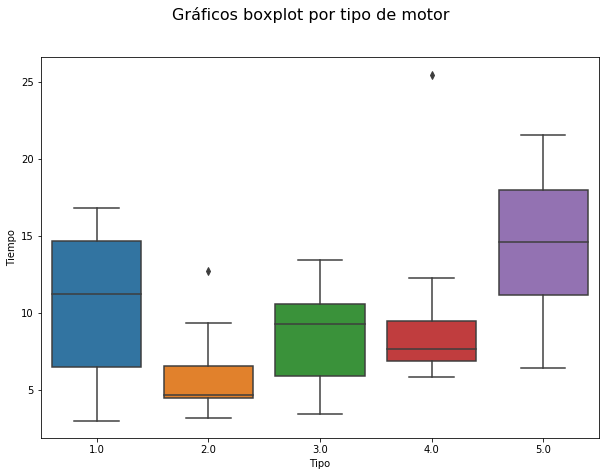

In [19]:
fig =  plt.figure(figsize=(10,7))
sns.boxplot(y=datos["Tiempo"],x=datos["Tipo"] )
fig.suptitle('Gráficos boxplot por tipo de motor',fontsize=16)
plt.show()

El gráfico muestra que en cada grupo de turbinas los datos son en general asimétrico, lo que justifica en principio el modelo Gamma.

### Preparación de datos para Stan

In [20]:
# matrix Y
Y = np.array(turbina)
N = np.shape(Y)[0]
T = np.shape(Y)[1]

# data
dat ={'Y':Y, 'N':N,'T':T}
dat

{'Y': array([[ 3.03,  3.19,  3.46,  5.88,  6.43],
        [ 5.53,  4.26,  5.22,  6.74,  9.97],
        [ 5.6 ,  4.47,  5.69,  6.9 , 10.39],
        [ 9.3 ,  4.53,  6.54,  6.98, 13.55],
        [ 9.92,  4.67,  9.16,  7.21, 14.45],
        [12.51,  4.69,  9.4 ,  8.14, 14.72],
        [12.95,  5.78, 10.19,  8.59, 16.81],
        [15.21,  6.79, 10.71,  9.8 , 18.39],
        [16.04,  9.37, 12.58, 12.28, 20.84],
        [16.84, 12.75, 13.41, 25.46, 21.51]]), 'N': 10, 'T': 5}

### El modelo en Stan

In [21]:
# Magic STAN
import pystan
%load_ext stanmagic

The stanmagic extension is already loaded. To reload it, use:
  %reload_ext stanmagic


In [22]:
%%stan -f gamma_reg_p1.stan
// Gamma log Linear Model for Y

data{
 // number of observations
 int N;
 // number of turbines
 int T;
 // responses
 matrix[N,T] Y;
}

parameters{
 vector<lower=0>[T]  phi;
 vector[T-1] beta_f;
  real mu;
}

model{
 vector[T] beta;
 matrix[N,T] mu_ij;
 

# priors
mu ~ normal(10,10);
beta_f ~ normal(0,10);    
phi ~ cauchy(0,10);

# update beta
beta[1] = 0;
for (j in 2:(T)){
    beta[j] = beta_f[j-1];
 }

# likelihood   
for (i in 1:N){
    for (j in 1:T){
      // means
      //mu_ij[i,j] = exp(mu + beta[j]);
      //mu_ij[i,j] = (mu_ij[i,j]>27)?27:mu_ij[i,j];
      mu_ij[i,j] = (mu + beta[j]);
      mu_ij[i,j] = (mu_ij[i,j]<0.01)?0.01:mu_ij[i,j];
      //
      Y[i,j] ~ gamma(phi[j]*(mu_ij[i,j])^2,phi[j]*mu_ij[i,j]);
    }    
  }    
}

generated quantities{
  matrix[N,T] residual;
  for (i in 1:N){
      residual[i,1] = (Y[i,1]-(mu))*sqrt(phi[T]);
      for (j in 2:(T)){
      residual[i,j] = (Y[i,j]-(mu + beta_f[j-1]))*sqrt(phi[j]);
      }
  }
}

Using pystan.stanc compiler..
-------------------------------------------------------------------------------
Model compiled successfully. Output stored in _stan_model object.
Type _stan_model in a cell to see a nicely formatted code output in a notebook
     ^^^^^^^^^^^
Access model compile output properties
_stan_model.model_file -> Name of stan_file [gamma_reg_p1.stan]
_stan_model.model_name -> Name of stan model [gamma_reg_p1_model]
_stan_model.model_code -> Model code [// Gamma log Linear  ....]


In [23]:
# compile
gamma_model_p1 = pystan.StanModel(file=_stan_model.model_file)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_66cb6a5b298fc8b85045df95eab3e2fd NOW.


In [24]:
# Muestreo
np.random.seed(127)
gamma_model_sample_p1 = gamma_model_p1.sampling(data=dat, iter = 4000)

In [25]:
print(gamma_model_sample_p1.stansummary(["mu","beta_f","phi"]))

Inference for Stan model: anon_model_66cb6a5b298fc8b85045df95eab3e2fd.
4 chains, each with iter=4000; warmup=2000; thin=1; 
post-warmup draws per chain=2000, total post-warmup draws=8000.

            mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu         10.55    0.03   1.52   7.86   9.51  10.45  11.46  13.89   1962    1.0
beta_f[1]  -4.47    0.04   1.72  -8.04  -5.56  -4.39  -3.32  -1.33   2115    1.0
beta_f[2]  -1.89    0.04   1.86  -5.68  -3.06  -1.82  -0.69    1.7   2420    1.0
beta_f[3]  -0.75    0.04   2.05  -4.83  -2.05  -0.75   0.59   3.36   2483    1.0
beta_f[4]   4.02    0.04   2.16  -0.26   2.63   4.03   5.41   8.33   2620    1.0
phi[1]      0.04  3.2e-4   0.02   0.01   0.03   0.04   0.06   0.09   4145    1.0
phi[2]      0.19  1.0e-3   0.09   0.05   0.12   0.18   0.24   0.41   7809    1.0
phi[3]       0.1  5.1e-4   0.05   0.03   0.07   0.09   0.13   0.21   8297    1.0
phi[4]      0.06  3.4e-4   0.03   0.02   0.04   0.06   0.08   0.13   7318    1.0
p

In [26]:
residuals = gamma_model_sample_p1.extract(['residual'])

In [27]:
residuals = residuals['residual']
residuals = residuals.reshape([residuals.shape[0],residuals.shape[1]*residuals.shape[2]])

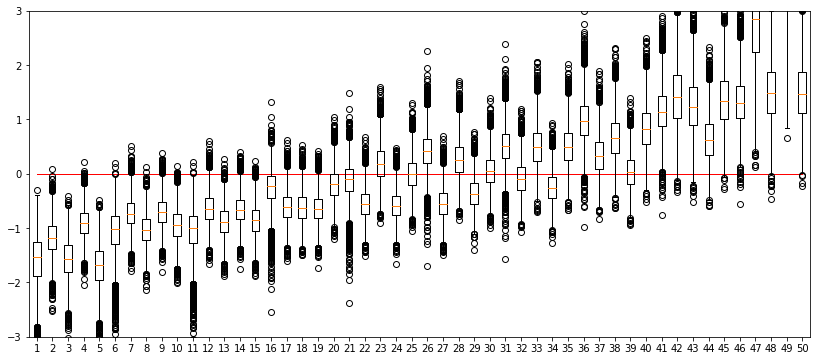

In [28]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize =(14,6))
ax.set_ylim(-3, 3)
plt.plot([1, 50], [0, 0], color='r', linestyle='-', linewidth=1)
ax.boxplot(residuals)

plt.show()


# Tarea 

1. Para cada uno de los modelos de la [tarea anterior ](./Modelos_Bayesianos_Regresion.ipynb) complete los programas Stan para calcular los residuales Bayesianos. Haga una discusión de los resultados.